<div style="text-align: center;">
<h2>INFSCI 2915 Foundations- Machine Learning - Spring 2018 </h2>
<h1 style="font-size: 250%;">Assignment #1</h1>
<h3>Issued Tuesday, 2/06/2018; Due Tuesday, 11:59pm, 2/13/2018</h3>
<h3>Total points: 100 </h3>
</div>

In [6]:
firstName = "Jiayu"
lastName = "Chen"
pittID = "jic117"

---

<h3>  Problem #1. K-nearest neighbors  [20 points] </h3> 

The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.
Suppose we wish to use this data set to make a prediction for Y when X1 = X2 = X3 = 0 using K-nearest neighbors.

|Obs.|X1|X2|X3|Y
|--|-------------------------------|
|1 |0|3|0|Green|
|2 |2|0|0|Green|
|3|0|1|3|Green|
|4|0|1|2|Red|
|5|-1|0|1|Red|
|6|1|1|1|Green|

<b>Problem #1-1.</b> Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0

In [7]:
import numpy as np
from numpy import float64

X_test=np.array([[0, 0, 0]], dtype=float64)
X_train=np.array([[0, 3, 0], [2, 0, 0],[0, 1, 3], [0, 1, 2], [-1, 0, 1], [1, 1, 1]], dtype=float64)
for i in range(len(X_train)):
    dist = np.linalg.norm(X_train[i]-X_test)
    print("Euclidean distance between Obs.",i+1,"and test point=", dist)

Euclidean distance between Obs. 1 and test point= 3.0
Euclidean distance between Obs. 2 and test point= 2.0
Euclidean distance between Obs. 3 and test point= 3.16227766017
Euclidean distance between Obs. 4 and test point= 2.2360679775
Euclidean distance between Obs. 5 and test point= 1.41421356237
Euclidean distance between Obs. 6 and test point= 1.73205080757


<b>Problem #1-2.</b> What is our prediction with K = 1? and explain why.

In [8]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import preprocessing

Y_train=np.array(['Green','Green','Green','Red','Red','Green'])
def knn(k, X_train, Y_train,X_test):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    print('Our prediction with K =',k, 'is', y_pred)
    
knn(1,X_train, Y_train,X_test)

Our prediction with K = 1 is ['Red']


Reason:
<br>
The shortest euclidean distance from train points to the test point is the fifth train point whose Y_train is red.
<br>
Therefore, when k=1, the nearest point to the test point is red and we can predict that the Y_test is red.

<b>Problem #1-3.</b> What is our prediction with K = 3? and explain why.

In [9]:
knn(3, X_train, Y_train,X_test)

Our prediction with K = 3 is ['Green']


Reason:
<br>
The shortest 3 euclidean distances from train points to the test point are the second, the fifth and the sixth whose Y_train are 2 Green and 1 Red. 
<br>
2/3 > 1/3.Therefore, when k=3, Y_train is Green

<b>Problem #1-4.</b>  How using a different number of K has an impact on the performance? explain.

A small value for K provides the most flexible fit, which will have low bias but high variance. 
<br>
Larger values of K provide a smoother and less variable fit.

---

<h3>  Problem #2. Answer those questions about linear regression [30 points] </h3>  
- Writing a code is not required for this question<br>
- Feel free to select any type of submission you are comfortable with (Since it may require some mathematical formula and symbols; MS Word, or scanned version of your writing will be fine) 

<b>Problem #2-1.</b> Find the least squared fit of a linear regression model using the following traning data

|Smoke index(x)|Lung cancer mortality index(y)|
|:--:|:-------------------------------:|
|127|115|
|121|128|
|94|128|
|126|156|
|102|101|
|111|128|
|95|115|
|89|105|
|101|87|

In [10]:
import pandas as pd
X_train=np.array([127, 121, 94, 126, 102, 111, 95, 89, 101]).reshape(-1,1)
Y_train=np.array([115, 128, 128, 156, 101, 128, 115, 105, 87]).reshape(-1,1)
x_y = np.concatenate((X_train,Y_train),axis=1)
df=(pd.DataFrame(x_y, columns= ['Smoke index(x)', 'Lung cancer mortality index(y)']))

def least_squared_formula(x, y):
    desc = df.describe()
    df['x_square'] = pow(df[x], 2)
    df['x*y'] = df[x]*df[y]
    y_mean = desc.at['mean', y]
    x_mean = desc.at['mean', x]
    sum_xy = df['x*y'].sum()
    sum_x = df[x].sum()
    sum_x_square = df['x_square'].sum()
    b1 = (sum_xy - y_mean*sum_x)/(sum_x_square-x_mean*sum_x)
    b0 = y_mean - b1*x_mean
    print('b0 is:', b0)
    print('b1 is:', b1)
    return b0, b1

b0, b1 = least_squared_formula('Smoke index(x)', 'Lung cancer mortality index(y)')

b0 is: 37.6003992016
b1 is: 0.750099800399


The least squared fit of a linear regression model is: y=37.6+0.75x

<b>Problem #2-2.</b> Given the test data below, compute the R-squared metric of the fitted model

|Xi|Yi|
|:--:|:-------------------------------:|
|90|103|
|106|131|
|105|85|
|115|99|
|113|144|

In [13]:
from sklearn.linear_model import LinearRegression
X_test=np.array([90, 106, 105, 115, 113]).reshape(-1,1)
Y_test=np.array([103, 131, 85, 99, 144]).reshape(-1,1)
model=LinearRegression()
fitted_model=model.fit(X_train,Y_train)
r_square = fitted_model.score(X_test,Y_test)
print ('The R-squared metric is',r_square)

The R-squared metric is 0.0406275252225


---

<h3>  Problem #3. This question involves the use of multiple linear regression on the Boston dataset [30 points]</h3> <br>
In this part, you should download and analyze **"Boston House Prices"** dataset. <br>
Here use a code below to download the  dataset: 

In [17]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
dataset = load_boston()
print(dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


<b>Problem #3-1</b> Print the description of the dataset. 

<b> Answer the following question:</b> 

- Whole dataset contains 14 attributes, (13 numeric/categorical predictive and 1 target value)  what is a abbreviation of the target value? 

In [18]:
print('The description of the dataset:')
print(dataset['DESCR'])

The description of the dataset:
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

<b>Problem #3-2 </b> Generate descriptive statistics using DataFrame. (hint: use "DataFrame . describe" function)<br>

Follow two steps to answer questions.
- Create a DataFrame usnig "data" from the dataset with columns using "feature_names".
- Generate descriptive statistics 

<b> Answer the following questions:</b> 

-  Which feature has the highest range (minimum and maximum value)?

-  Which feature has the lowest mean?  

-  Which feature has a lowest standard deviation? 

In [21]:
import pandas as pd
print('Describe original data')
data = dataset.data
data_frame = (pd.DataFrame(dataset.data, columns= dataset.feature_names))
desc = data_frame.describe()
desc

Describe original data


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [24]:
# Problem #3-2 Q1
print('Q1: Which feature has the highest range (minimum and maximum value)?')
highest_range_feature = ''
highest_range = 0
for i in range(desc.shape[1]):
    min = desc.at['min', dataset.feature_names[i]]
    max = desc.at['max', dataset.feature_names[i]]
    temp_range = max - min
    if temp_range > highest_range:
        highest_range = temp_range
        highest_range_feature = dataset.feature_names[i]
print("The feature of highest range is '",highest_range_feature, "'\n")

# Problem #3-2 Q2
print('Q2: Which feature has the lowest mean?')
def find_lowest(target):
    lowest = desc.at[target, dataset.feature_names[0]]                      
    for i in range(desc.shape[1]):
        aim = desc.at[target, dataset.feature_names[i]]
        if aim < lowest:
            lowest = aim
            lowest_feature = dataset.feature_names[i]
    return lowest_feature

lowest_mean = find_lowest('mean')
print("The feature of lowest mean is '", lowest_mean, "'\n")

# Problem #3-2 Q3
print('Q3: Which feature has a lowest standard deviation?')
lowest_std = find_lowest('std')
print("The feature of lowest standard deviation is '", lowest_std, "'\n")

Q1: Which feature has the highest range (minimum and maximum value)?
The feature of highest range is ' TAX '

Q2: Which feature has the lowest mean?
The feature of lowest mean is ' CHAS '

Q3: Which feature has a lowest standard deviation?
The feature of lowest standard deviation is ' NOX '



# <b>Problem #3-3 </b> Feature Scaling

<b> Answer the following questions:</b> 

- From the information above, Do you recommend **feature scaling** to improve performance? Explain.  

- What is a difference between MinMaxScaler and StandardScaler? 

Q1: Yes, I recommend feature scaling to improve performance. The reason is that the ranges of data in each colum have a big difference with each other. After feature scaling, their range or mean will be same, which is convenient for analysis.<br><br>
Q2: MinMaxScaler scales features to be in range 0 -1. StandardScaler scales features so that they are all with zero mean and unit variance

<b>Problem #3-4 </b> Calculate and report **correlations** between features and the target 

<b> Answer the following questions:</b> 

- What is a difference between positive and negative numbers on the correlation table? Explain.
- What is the lowest number in the table? Do you think it is the most or the least helpful features in predicting the
target class? Explain.

In [25]:
print('Corrections between features and the target are:')
target_dataframe = pd.DataFrame({'MEDV': dataset.target})
data_frame.corrwith(target_dataframe['MEDV'], axis=0)

Corrections between features and the target are:


CRIM      -0.385832
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
dtype: float64

Q1: What is a difference between positive and negative numbers on the correlation table? Explain.<br>
Positive number means positive correlation and negative number means negative correlation between features and target.
<br><br>
Q2: What is the lowest number in the table? Do you think it is the most or the least helpful features in predicting the target class? Explain.<br>
The lowest number in the table is -0.737663, the correction between feature 'LSTAT' and the target. Yes.<br>
The sign of the correlation value just means the direction of the relationship. The absolute value of correlation shows the degree or strength of the relationship between variables. And the absolute value of -0.737663 is the largest in the table which indicates a strong degree of correction. Therefore, it is the most helpful feature in predicting the target class.

<b>Problem #3-5 </b> 
Follow two steps to answer questions.

- Add 1 more column (dataset.target) to your DataFrame (give a name).

- Find the correlation matrix that shows the correlation between each pair of features. <br>

- Plot a correlation matrix<br> You can use the code below or write your own code to plot a correlation matrix *(extra point for writing your own code)* 

 <b>Answer the following questions:</b> 

- What is the correlation between the feature RM and the LSTAT? 
- What does this value of correlation indicate?
- Can you detect most or the least helpful features in predicting the target class from correlation matrix or from plot? How?

correlation plot:


<IPython.core.display.Javascript object>


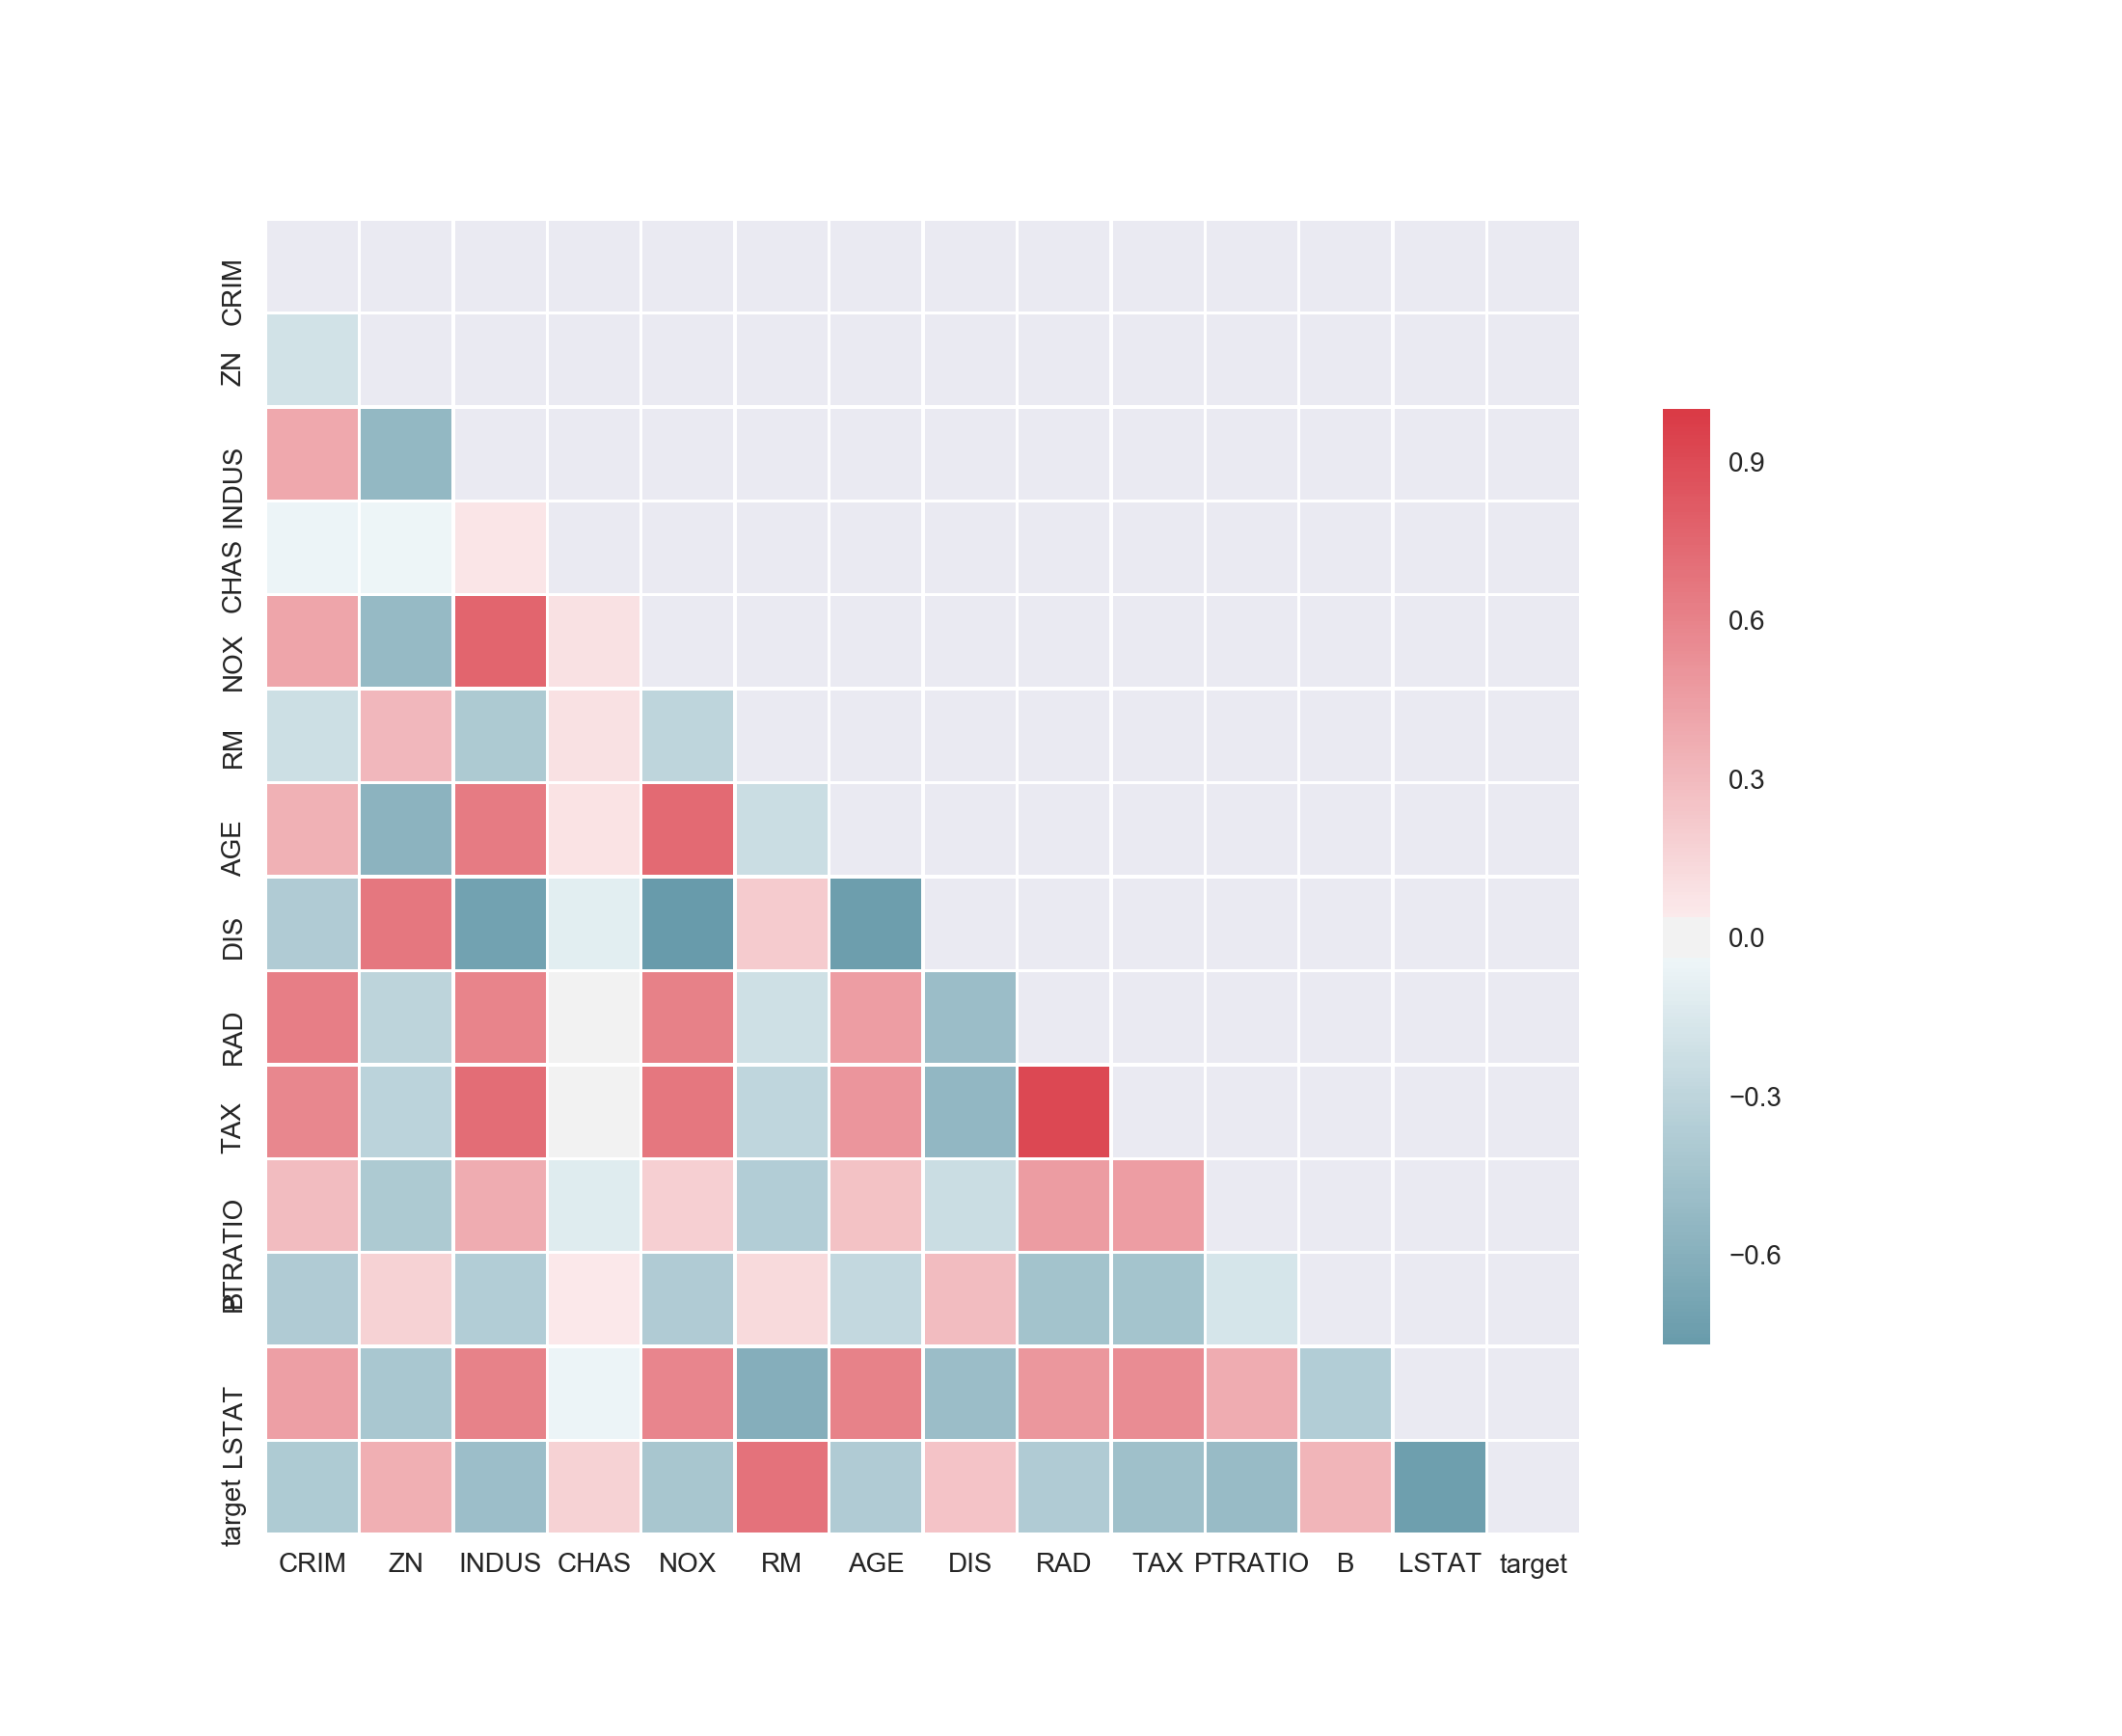

correlation matrix:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [26]:
%matplotlib notebook
from sklearn.datasets import load_boston
dataset = load_boston()
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="dark")
print('correlation plot:')
# Get correlation matrix
df = (pd.DataFrame(dataset.data, columns= dataset.feature_names))
df['target'] = dataset.target
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.9, cbar_kws={"shrink": .7})
print('correlation matrix:')
corr

In [27]:
print('Q1: What is the correlation between the feature RM and the LSTAT?')
df.corrwith(target_dataframe['MEDV'], axis=0)
df.corrwith(df['RM'])['LSTAT']

Q1: What is the correlation between the feature RM and the LSTAT?


-0.61380827186639575

Q2: What does this value of correlation indicate?<br>
This value of correlation indicate that the feature RM and LSTAT have a negative relationship, the degree of which is moderate.<br><br>
Q3: Can you detect most or the least helpful features in predicting the target class from correlation matrix or from plot? How?<br>
Yes. From correlation matrix, I can find LSTAT as the most helpful feature because it's absolute value is highest. From correlation plot, I can find RM and LSTAT as two most helpful feature because their color are darkest. But I cannot compare these two features which is more helpful because they are not in the same color scheme.

<b>Problem #3-6 </b> Scatter plot. <br> 

Follow three steps to answer questions <br> 
- Plot LSTAT versus target variable 
- Plot RM versus target variable 
- Plot CHAS versus target variable <br> 

<b> Answer the following questions:</b> 
- Is the relationship linear?
- Which looks the most nonlinear? Explain your chouce


<IPython.core.display.Javascript object>


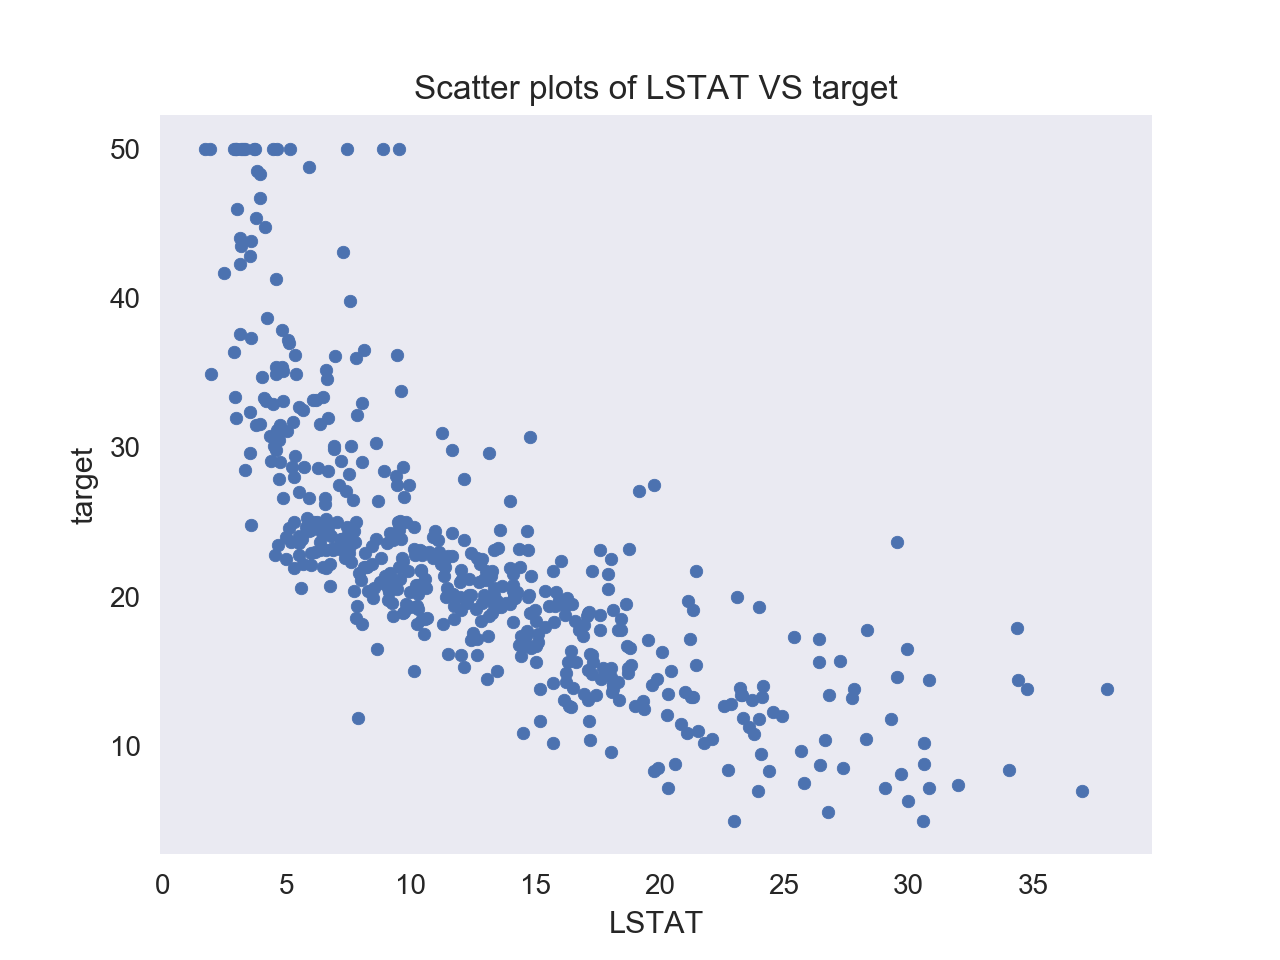

<IPython.core.display.Javascript object>


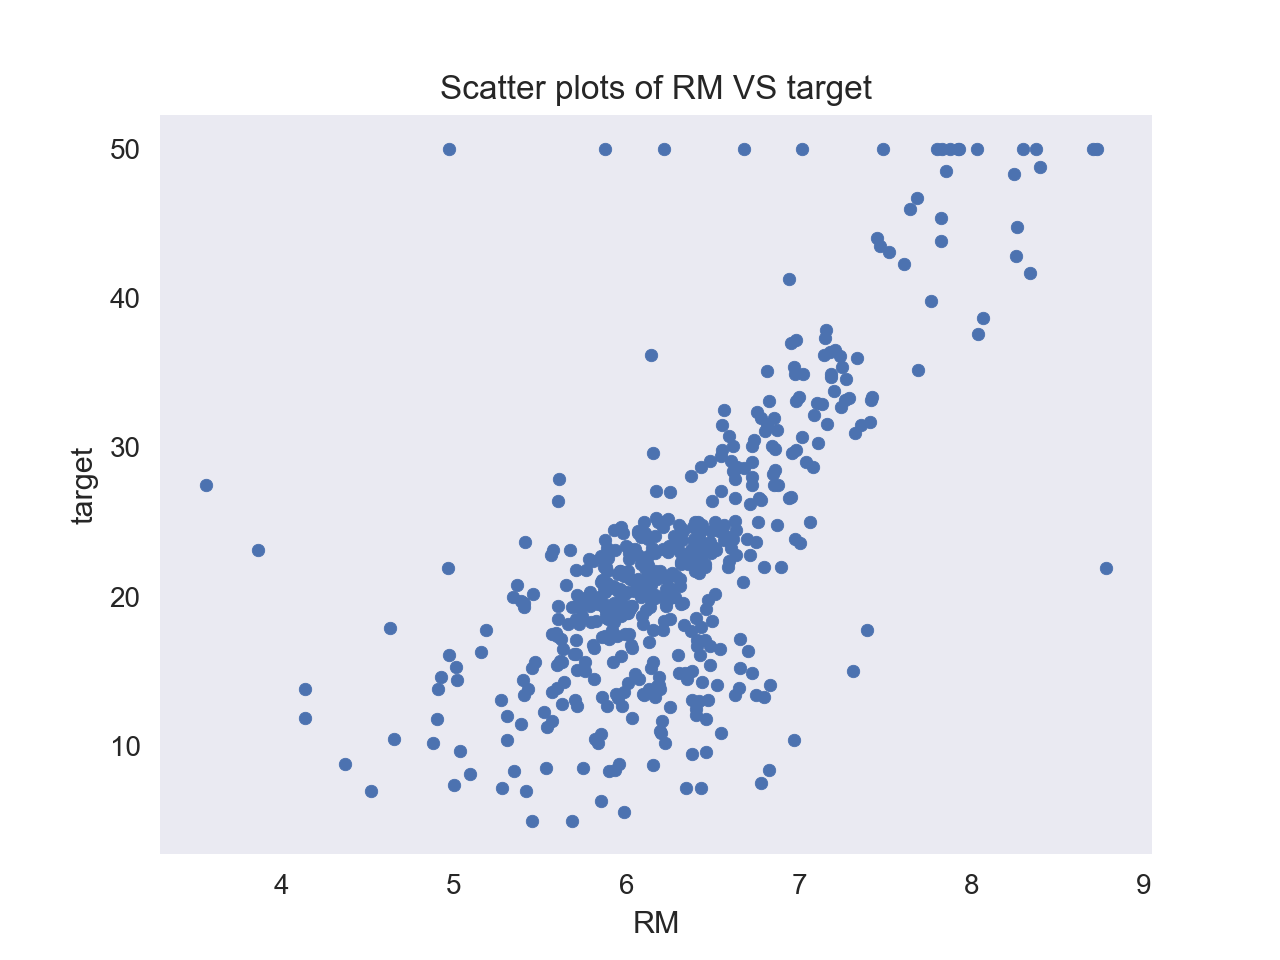

<IPython.core.display.Javascript object>


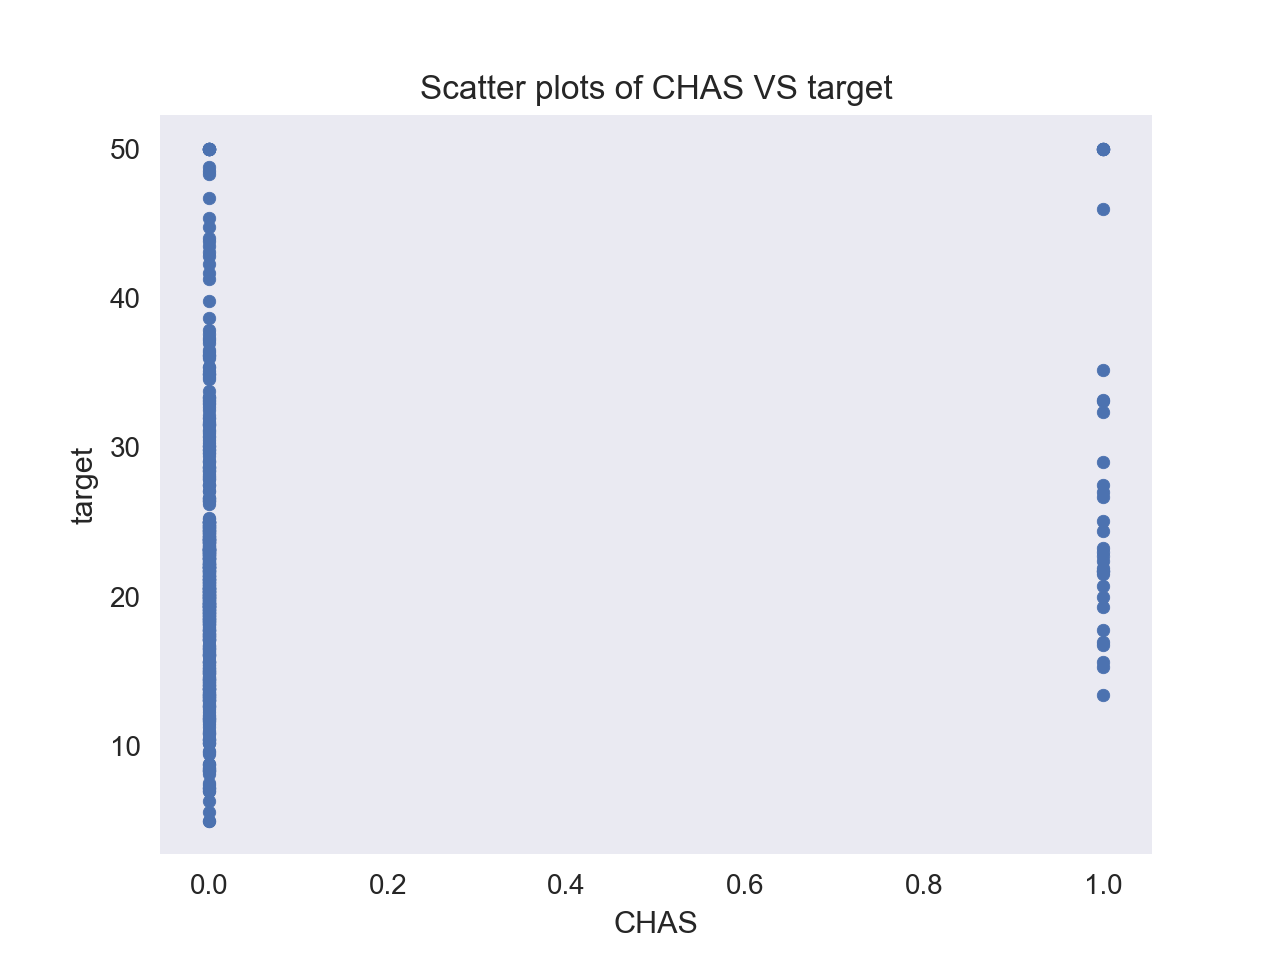

In [28]:
df.plot(kind='scatter', x='LSTAT', y='target', title='Scatter plots of LSTAT VS target')
df.plot(kind='scatter', x='RM', y='target', title='Scatter plots of RM VS target')
df.plot(kind='scatter', x='CHAS', y='target', title='Scatter plots of CHAS VS target')
plt.show()

Q1: The relationship of LSTAT and target looks not linear, and the last two relationships are linear.<br>
Q2: The first one looks the most nonlinear because most of it's points are not on a line.

<b>Problem #3-7.</b> Follow steps to answer questions.
> *Use train_test_split() with the option "random_state=0".

1. Fit a linear regression model with RM and LSTAT features only. Find the R-squared metric. 
2. Fit a linear regression model using RM, LSTAT and include the interaction term (RM * LSTAT). How R-squared metric differs from the previous model without interaction term?
3. Fit a linear regression model using LSTAT and include the polynomial term ( $LSTAT^2$).  Find the R-squared metric.
4. Fit linear regression model using LSTAT and include the polynomial term ( $LSTAT^2$ and $LSTAT^3$ ). Find the R-squared metric. 
- How does R-squared metric differ in the previous models ? <br> Comment your observation. 

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Fit a linear regression model
def fit_linear_regression(X_train, Y_train, X_test, Y_test):
    model=LinearRegression()
    fitted_model=model.fit(X_train,Y_train)
    r_square = fitted_model.score(X_test,Y_test)
    print ('R-squared metric is',r_square)
    
# Q1:
print('Q1: The R-squared metric of RM and LSTAT:')
# Split to train and test
rm = df['RM'].values.reshape(-1,1)
lstat = df['LSTAT'].values.reshape(-1,1)
rm_lstat = np.concatenate((rm,lstat),axis=1)
target = df.target.values.reshape(-1,1)
X_train1, X_test1, Y_train1, Y_test1= train_test_split(rm_lstat, target, random_state= 0)
fit_linear_regression(X_train1, Y_train1, X_test1, Y_test1)

# Q2:
print('Q2: The R-squared metric of RM, LSTAT and (RM * LSTAT): ')
rm_lstat2 = np.concatenate((rm,lstat,rm*lstat),axis=1)
X_train2, X_test2, Y_train2, Y_test2= train_test_split(rm_lstat2, target, random_state= 0)
fit_linear_regression(X_train2, Y_train2, X_test2, Y_test2)
print('R-squared metric is higher than previous model without interaction term.')

# Q3:
print('Q3: The R-squared metric of LSTAT and LSTAT^2: ')
lstat_square=pow(lstat,2)
rm_lstat3 = np.concatenate((lstat, lstat_square), axis=1)
X_train3, X_test3, Y_train3, Y_test3= train_test_split(rm_lstat3, target, random_state= 0)
fit_linear_regression(X_train3, Y_train3, X_test3, Y_test3)

# Q4:
print('Q4: The R-squared metric of LSTAT, LSTAT^2 and LSTAT^3: ')
lstat_cubic=pow(lstat,3)
rm_lstat4 = np.concatenate((lstat, lstat_square, lstat_cubic), axis=1)
X_train4, X_test4, Y_train4, Y_test4= train_test_split(rm_lstat4, target, random_state= 0)
fit_linear_regression(X_train4, Y_train4, X_test4, Y_test4)

Q1: The R-squared metric of RM and LSTAT:
R-squared metric is 0.569244541584
Q2: The R-squared metric of RM, LSTAT and (RM * LSTAT): 
R-squared metric is 0.661520770677
R-squared metric is higher than previous model without interaction term.
Q3: The R-squared metric of LSTAT and LSTAT^2: 
R-squared metric is 0.551875335414
Q4: The R-squared metric of LSTAT, LSTAT^2 and LSTAT^3: 
R-squared metric is 0.576883354518


Q5: How does R-squared metric differ in the previous models?<br>
These four R-squared metrics are slightly different with each other.<br><BR>
Comparing the R-squared metric of Q1 and Q2:<br>
The R-squared metric of Q2 is larger, which means that RM*LSTAT is an important feature comparing with just RM and LSTAT.
<br><BR>
Comparing R-squared metric of Q3 and Q4:<br>
Adding the feature of LSTAT^3 will let the R-squared metric larger, which means that LSTAT^3 is an important feature adding to the basic of LSTAT and LSTAT^2.<br>

Comparing R-squared metric of Q2 and Q4:<br>
Features of RM and RM*LSTAT are more important of predicting target than the features of LSTAT^2 and LSTAT^3

<b>Problem #3-8.</b> Fit all features (13 features) in the dataset to a multiple linear regression model, and report<br> 

> (1) p-values for each feature. 

<b> Answer the following questions:</b> 

- What does p-value means
- What are the important features? <br> 


In [106]:
import statsmodels.formula.api as smf
model=smf.ols('target~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT', df) 
Fitting_results=model.fit() 
print(Fitting_results.summary().tables[1])
print('p-values are:\n',Fitting_results.pvalues)

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4911      5.104      7.149      0.000      26.462      46.520
CRIM          -0.1072      0.033     -3.276      0.001      -0.171      -0.043
ZN             0.0464      0.014      3.380      0.001       0.019       0.073
INDUS          0.0209      0.061      0.339      0.735      -0.100       0.142
CHAS           2.6886      0.862      3.120      0.002       0.996       4.381
NOX          -17.7958      3.821     -4.658      0.000     -25.302     -10.289
RM             3.8048      0.418      9.102      0.000       2.983       4.626
AGE            0.0008      0.013      0.057      0.955      -0.025       0.027
DIS           -1.4758      0.199     -7.398      0.000      -1.868      -1.084
RAD            0.3057      0.066      4.608      0.000       0.175       0.436
TAX           -0.0123      0.004     -3.278      0.0

Q1: What does p-value means?<br>
Small value reflects that there is an association between features and output.<br>
Large value reflects low association between features and output.

Q2: What are the important features? 
All features are important except INDUS and AGE.

---

<h3>  Problem #4. Ordinary Least Square (OLS) [20 points] </h3> <br>

<b>Problem #4-1.</b>  Ordinary Least Square (OLS), calculate parameters

Follow two steps<br> 

- From your DataFrame generate new DataFrame with 2 columns ('LSTAT' and target)  

- Using the least squared formula below write a function to calulate $B_0$  and $B_1$  from your new DataFrame where 'LSTAT' = x and target = y. *(hint you can add 2 colums to your DataFrame($x*x$  and  $x*y$), check the problem #2-1)*

\begin{array} \\
    \hat{\beta}_0 = \bar{y} - \hat{\beta}_1\bar{x}, \\ \\
    \hat{\beta}_1 = \frac{\sum_{i=1}^n y_i x_i - \bar{y}\sum_{i=1}^n x_i}{\sum_{i=1}^n x^2 - \bar{x}\sum_{i=1}^n x_i} \\ \\
    \text{where }\bar{x} = \frac{\sum_{i=1}^y x_i}{n} \text{ and } \bar{y} = \frac{\sum_{i=1}^y y_i}{n} \\
\end{array}

In [148]:
df = df.loc[:, ['LSTAT', 'target']]
def least_squared_formula(x, y):
    desc = df.describe()
    df['x_square'] = pow(df[x], 2)
    df['x*y'] = df[x]*df[y]
    y_mean = desc.at['mean', y]
    x_mean = desc.at['mean', x]
    sum_xy = df['x*y'].sum()
    sum_x = df[x].sum()
    sum_x_square = df['x_square'].sum()
    b1 = (sum_xy - y_mean*sum_x)/(sum_x_square-x_mean*sum_x)
    b0 = y_mean - b1*x_mean
    print('b0 is:', b0)
    print('b1 is:', b1)
    return b0, b1
b0, b1 = least_squared_formula('LSTAT','target')

b0 is: 34.5538408794
b1 is: -0.950049353758


<b>Problem #4-2.</b>  Ordinary Least Square (OLS) <br>
Using formula below and using $B_0$ and $B_1$ from previous problem calculate $\hat{y}$ $where$ x = 'LSTAT'
- Add your predicted data to the DataFrame 


\begin{array} \\
    \hat{y} = \hat{\beta}_0 + \hat{\beta}_1*x, \\ \\
\end{array}

In [154]:
hat_y = b0+b1*df['LSTAT']
df['predict_y']=hat_y
df.describe()

,LSTAT,target,x_square,x*y,predict_y
count,506.000000,506.000000,506.000000,506.000000,506.000000
mean,12.653063,22.532806,210.993989,236.757231,22.532806
std,7.141062,9.197104,236.061920,85.769221,6.784361
min,1.730000,5.000000,2.992900,69.102000,-1.519533
25%,6.950000,17.025000,48.303700,173.704250,18.445754
50%,11.360000,21.200000,129.050000,230.577500,23.761280
75%,16.955000,25.000000,287.472100,281.028750,27.950998
max,37.970000,50.000000,1441.720900,700.335000,32.910255


<b>Problem #4-3.</b>  Verification 

Predict $\hat{y}$ using linear regression model *(for this part you don't need to use train test split) *

- Add your predicted data to the DataFrame

Compare 3 column:
- target 
- predicted column using our own code, ( from problem 4-2)
- predicted column using linear regression model 

Comment your observations 



<IPython.core.display.Javascript object>


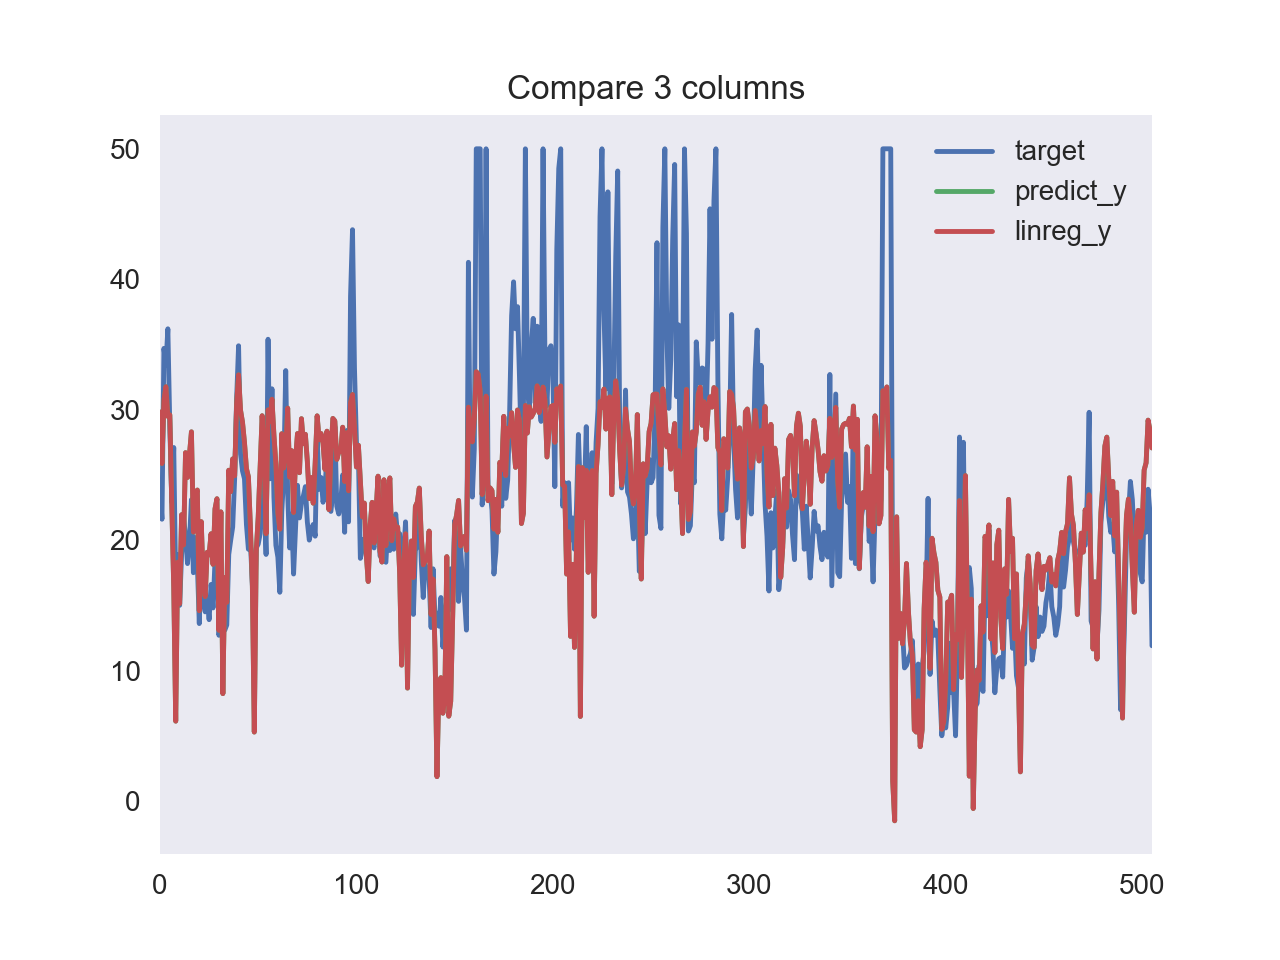

In [180]:
x = df['LSTAT'].values.reshape(-1, 1)
y = df['target'].values.reshape(-1, 1)
linreg= LinearRegression().fit(x, y)
linreg_y = linreg.intercept_ + linreg.coef_*x
df[['target', 'predict_y', 'linreg_y']].plot()
_ = plt.title('Compare 3 columns')
plt.show()

My observation: In the first 150 and the last 150 rows of these three columns, the two kinds of predict are relatively accurate. But in the middle 150～350 rows of data, these two kinds of predict always lower than target.

### Submission
Once you complete the assignment, <br>
Name your file in the format of <b style='color:red'>LASTNAME-PITTID-Assignment1.ipynb</b>, and submit it on the courseweb